<a href="https://colab.research.google.com/github/jinhyukbae/playdata/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서와 AutoGrad

* 파이토치는 기본적인 수학 계산용 라이브러리를 바탕으로 그 위에 딥러닝에 필요한 그래프 형태 계산 방식을 추가한 라이브러리
* 행렬 계산이 많은 딥러닝의 특성으로 인해 `파이토치의 자료구조 ≠ 기존 파이썬의 자료구조`
    * 예) 텐서 `Tensor`

In [1]:
import torch # 파이토치 라이브러리 임포트

## 텐서

* 파이토치에서 다양한 수식을 계산하는 데 사용하는 가장 기본적인 자료구조
* 수학의 벡터와 행렬을 일반화한 개념 → 숫자들을 특정한 모양으로 배열
* 차원/랭크`Rank`
    * 랭크 0 텐서 : 숫자가 하나인 스칼라`Scalar` ( `1 / 모양 : []` )
    * 랭크 1 텐서 : 일렬로 숫자를 나열한 벡터`Vector` ( `[1, 2, 3] / 모양 : [3]` )
    * 랭크 2 텐서 : 2차원 행렬`Matrix` ( `[[1,2,3]] / 모양 : [1,3]` )
    * 랭크 3 텐서 : 정육면체 같은 3차원 행렬 ( `[[[1,2,3]]] / 모양 : [1,1,3]` )
    * 3차원 이상 → 랭크 n 텐서

    
```
([[1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]])
```

* 랭크 2 텐서(2차원 행렬)
* 행3개 열 3개

In [2]:
# x 행렬 : 1부터 9까지 숫자를 가로 3줄 세로 3줄로 배열한 텐서로 만들어 줄 것
# 가로와 세로 2차원으로만 이루어진 랭크 2 텐서
# torch.tensor 텐서를 만들어주는 생성자
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]]) #텐서 = 배열
x

# 가로3 세로3을 가진 2차원 행열 랭크 2텐서

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [3]:
# 배열 모양 준수 가로 세로 모양이 같아야 함 
try:
  y = torch.tensor([[1,2,3,9],[4,5,6],[7,8,9]])

except Exception as e:
  print(type(e))
  print(e)

<class 'ValueError'>
expected sequence of length 4 at dim 1 (got 3)


In [4]:
# 텐서의 구체적인 형태 =모든 차원의 원소 개수 학인
print(f"size : {x.size()}") #행3 열3의 사이즈다 텐서의 모양
print(f"shape : {x.shape}") #행3 열3의 사이즈다 size=shape
# 텐서의 랭크/차원 확인
print(f"랭크(차원):{x.ndimension()}") #tensor.ndimension() 랭크/차원 확인

size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원):2


In [5]:
# 랭크 차원 늘리기 -> 랭크/차원이 변해도 원소 수에는 영향이 없음
x = torch.unsqueeze(x,0) #torch.unsqueeze(tensor,n) 0번째 차원에 1 차원값을 추가
print(x) # 원소는 그대로 지만 [] 하나 늘음
print(f"size : {x.size()}") # [3,3] -> [1,3,3] 2차원->3차원
print(f"shape : {x.shape}") 
print(f"랭크(차원):{x.ndimension()}") # 2->3

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원):3


In [13]:
def add_dimension(n):
  x_ = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
  x_ = torch.unsqueeze(x_,n) #torch.unsqueeze(tensor,n) n번째 차원에 1 차원값을 추가
  print(x) # 
  print(f"size : {x_.size()}") 
  print(f"shape : {x_.shape}") 
  print(f"랭크(차원):{x_.ndimension()}")
  return x_

In [7]:
add_dimension(0)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원):3


In [8]:
add_dimension(1) 

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([3, 1, 3])
shape : torch.Size([3, 1, 3])
랭크(차원):3


In [9]:
add_dimension(2)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([3, 3, 1])
shape : torch.Size([3, 3, 1])
랭크(차원):3


In [11]:
try:
    add_dimension(3) # 없는 차원에 추가하려고 했을 때
except Exception as e:
    print(type(e))
    print(e)

<class 'IndexError'>
Dimension out of range (expected to be in range of [-3, 2], but got 3)


In [12]:
# 랭크/차원 줄이기 -> 원소 수 영향 x 모양만 바뀜
# 2차원 x에 0번째에 1차원(랭크)을 추가해서 3차원으로 변경된 [1,3,3] 상태임  
x = torch.squeeze(x) #squeeze(tensor) 차원 별도로 지정할 필요없음 크기가 1인 차원을 찾아서 알아서 없애줌 
print(x)
print(f"size : {x.size()}") # 앞에 1만 없어짐 
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [14]:
x0 = add_dimension(0)
x0 #0번째 차원이 추가된 텐서 [3,3] 이였는데 0번째 차원에 1이 추가돼서 [1,3,3]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원):3


tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [16]:
x0 = torch.squeeze(x0)
print(f"size : {x.size()}") # 앞에 0차원이던 1만 없어짐 
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")

size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [17]:
x1 = add_dimension(1)
x1 = torch.squeeze(x1)
print(f"size : {x1.size()}") # [3,3]이였는데 1번째 차원에 1이 추가돼서 [3,1,3]
print(f"shape : {x1.shape}")
print(f"랭크(차원) : {x1.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 1, 3])
shape : torch.Size([3, 1, 3])
랭크(차원):3
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [19]:
x2 = add_dimension(2)
x2 = torch.squeeze(x2)
print(f"size : {x2.size()}") #[3,3] 이였는데 2번째차원에 1이추가돼서 [3,3,1]
print(f"shape : {x2.shape}")
print(f"랭크(차원) : {x2.ndimension()}") #두번째 차원 1을 삭제했기 때문에 원상태 [3,3]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 3, 1])
shape : torch.Size([3, 3, 1])
랭크(차원):3
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [20]:
# tensor.view(모양) : 직접 텐서의 모양 바꾸기
print(x)
x = x.view(9) # 랭크2인(가로,세로/ 2차원배열) [3,3]을 -> 랭크1 [9]로 바꿈
print(x)
print(f"size : {x.size()}")
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size : torch.Size([9])
shape : torch.Size([9])
랭크(차원) : 1


In [21]:
len(x) # 전체 원소 수

9

In [22]:
y = x.view((3, 3)) # 튜플이나 리스트로 원하는 모양을 넣으면 해당 모양으로 바꿔줌
# 단 전체 원소 수 크기의 약수로 구성하고, 곱하기 한 결과가 전체 원소 수를 넘으면 안됨
# 원소가 9개라면 1x9 3x3 처럼 딱 딱 나눠져야함 
print(y)
print(f"size : {y.size()}")
print(f"shape : {y.shape}")
print(f"랭크(차원) : {y.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [23]:
try:
    x.view((2, 4)) # 9개를 2x4로 표현? 할수없다 
except Exception as e:
    print(type(e))
    print(e)

<class 'RuntimeError'>
shape '[2, 4]' is invalid for input of size 9


# 텐서 연산과 행렬 곱

* 행렬
    * 랭크 2 텐서
    * 숫자를 네모꼴로 배치한 2차원 배열
    * **행** : 행렬의 높이
    * **열** : 행렬의 너비
* 두 행렬 A, B의 행렬곱 시 조건
    * **A의 열 수**와 **B의 행 수**는 같아야 함
    * 행렬곱 A∙B의 결과 행렬의 행 개수는 A와 같고, 열의 개수는 B와 같음
<br><br>

$
\begin{bmatrix}a&b&c\\d&e&f\\\end{bmatrix}
\begin{bmatrix}g&h\\i&j\\k&l\end{bmatrix}=
\begin{bmatrix}ag+bi+ck&ah+bj+cl\\dg+ei+fk&dh+ej+fl\end{bmatrix}
\\
2\times3\quad\quad\quad3\times2\quad=\quad2\times2 
$
<br><br>

In [ ]:
# 2행 3열 2x3 3행 2열 3x2 짜리는 행렬곱이 가능 (a의 열수와 b의 행수가 같아서)
# 결과는 2행 2열 2x2로 나옴 (a의 행 2 b의 열 2 기 때문에 2x2가 되는 거임)

In [30]:
# 행렬 w : 정규분포에서 무작위 값을 뽑아서 텐서를 생성
# 정규분포 (normal distribution) : 평균 0 표준편차 1인 확률분포 
# torch.randn(행의 크기, 열의 크기, dtype...)
torch.manual_seed(100)
w = torch.randn(5, 3, dtype=torch.float) #실수 내 범위에서 뽑도록
# 행렬 x : 직접 실수형 원소들을 넣어서 3 x 2 모양을 가진 텐서를 정의
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
# 행렬 곱을 A의 열과 B의 행이 크기가 일치 해야 함
print(f"w size : {w.size()}") 
print(f"x size : {x.size()}") 
print(f"w : {w}") 
print(f"x : {x}") 

w size : torch.Size([5, 3])
x size : torch.Size([3, 2])
w : tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134],
        [-0.3172, -0.8660,  1.7482],
        [-0.2759, -0.9755,  0.4790],
        [-2.3652, -0.8047,  0.6587]])
x : tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [32]:
torch.manual_seed(10)
# 5,2 사이즈의 행렬 b, rand n 을 통해 만들겟다
b = torch.randn(5,2, dtype=torch.float)
print(f"b size : {b.size()}") 
print(f"b : {b}") 

b size : torch.Size([5, 2])
b : tensor([[-0.6014, -1.0122],
        [-0.3023, -1.2277],
        [ 0.9198, -0.3485],
        [-0.8692, -0.9582],
        [-1.1920,  1.9050]])


In [34]:
# w 행렬과 x 행렬 간의 곱 연산
# wx = w * x 오류
wx = torch.mm(w, x) # w의 열과 x의 행은 3으로 같아서 행렬곱 가능 w의 행 5와 x의 열 2만 남아서 5 x2 사이즈의 shape가 나옴
print(f"wx size : {wx.size()}") 
print(f"wx : {wx}") 

wx size : torch.Size([5, 2])
wx : tensor([[ -2.4662,  -2.7853],
        [-15.4742, -18.9280],
        [  5.8256,   6.3906],
        [ -0.8074,  -1.5797],
        [ -1.4855,  -3.9966]])


In [35]:
# wx 행렬의 원소에 b 행렬 원소 더하기 
result = wx + b # 더하기는 또 되네
print(f"result size : {result.size()}") 
print(f"result : {result}")   

result size : torch.Size([5, 2])
result : tensor([[ -3.0676,  -3.7975],
        [-15.7765, -20.1557],
        [  6.7454,   6.0421],
        [ -1.6766,  -2.5379],
        [ -2.6775,  -2.0916]])


## Autograd
* Auto + gradient
* **수식의 기울기**를 자동으로 계산 해주는 기능


* 딥러닝 < 머신러닝
* 머신러닝 모델은 입력된 데이터를 기반으로 학습
* 아직 충분한 데이터를 보지 못해서 학습이 끝나지 않은 모델의 경우는, 정답이 아닌 결과를 출력할 가능성이 높다 

**거리** `distance`
* 데이터에 대한 정답과 머신러닝 모델이 예측한 결과의 차이를 산술적으로 (계산으로, 숫자로) 표현한 것
* 한 개(행) 씩의 데이터

거리들을 평균내면 오차가 나옴 

**오차** (손실) `loss` (error)
* 학습한 데이터로 계산한 거리들의 평균
* 전체 데이터
* 오차가 작은 머신러닝 모델일 수록 주어진 데이터에 대해 더 정확한 답을 낸다고 볼 수 있음
* mse 같은 것들이 오차 구하는 거

* 오차를 줄이고(개선하는) 알고리즘 중에 가장 유명하고 많이 쓰이는 알고리즘 = **경사하강법** `gradient descent`

**경사하강법**
* 오차를 <mark>수학 함수로 표현</mark>한 후, 미분하여 (기울기) 이 함수의 기울기를 구해서 오차의 최솟값이 있는 방향을 찾아내는 알고리즘 
* 경사하강법 -> 함수가 수정 -> 기울기 ->오차가 최소화하는 지점으로 변동

  * https://youtu.be/GEdLNvPIbiM
  * https://youtu.be/GmtqOlPYB84


![경사하강법의 개념도](https://github.com/bigdata-young/ai_26th/raw/main/img/dl_01_01.jpg)

> 파이토치의 Autogred는 미분 계산(기울기 계산)을 자동화하여 경사하강법을 구현하는 수고를 덜어줌

In [37]:
# 값이 1인 스칼라 텐서 w(weight 가중치)
#w = torch.tensor(1.0) # 값이 1인 0차원인 스칼라 텐서

# 파이토치의 Autograd 기능을 통해 자동으로 기울기 값을 계산하면
# w에 반영되도록 -> w에 대한 미분값을  w.grad에 저장

# requires_grad=True 해당 토치에 대해 미분값을 계산해서 자동으로 .grad 속성에 저장해주세요
w = torch.tensor(1.0, requires_grad=True) 
w # w가 들어간 수학함수가 있다면 해당 함수가 미분 되었을 때 그 값을 w.grad에 반영하게 되는 겁니다


tensor(1., requires_grad=True)

In [38]:
a = w * 3 # a=3w

In [39]:
l = a ** 2 # a^2 = (3w)^2 = 9w

$l = a^2 = (3w)^2 = 9w^2$

In [40]:
# l을 w로 미분
# l을 w로 미분하기 위해 연쇄 법칙 (chain rule) 
# l -> a^2 -> 3w^2 ->9w^2 가 연쇄법칙임 

l.backward()
print(f"l을 w로 미분한 값은{w.grad}") # 9w^2이면 사실상 9x2임 왼쪽 9 오른쪽 승 2 곱하기
# 미분한 값은 w.grad 값에 알아서 저장 됨

l을 w로 미분한 값은18.0


# 경사하강법으로 이미지 복원

## 오염된 이미지 문제
* weird_function()를 통해 오염된 이미지가 만들어짐
* 오염된 이미지와 weird_function() 함수를 활용해 원본 이미지를 복원

## 문제 해결
* 오염된 이미지와 크기가 같은 랜덤 텐서(무작위 이미지 텐서)를 생성
* 랜덤 텐서를 weird_function에 입력해 똑같이 오염된 이미지를 생성 → 가설`hypothesis`
    * 원본 이미지 → weird_function() → 오염된 이미지
    * 무작위 이미지 → weird_function() → 가설
* *가설 = 오염된 이미지*라면 *무작위 이미지 = 원본 이미지*도 성립
* 그러므로 weird_function(랜덤 텐서) = 오염된 이미지 관계가 성립하도록 만듦


머신러닝 모델이 학습 = 모델이 출력한 결과값과 정답의 차이, 즉 **오차가 최소화된다**는 뜻.
* 이 문제에서의 오차 : 가설과 원본 이미지가 weird_function() 함수를 통해 오염되기 전의 이미지(정답) 사이의 거리
* 이 오찻값이 최솟값이 되도록 랜덤 텐서를 바꿔주는 것이 목표

**경사하강법 알고리즘**
* 파이토치의 Autograd 기능을 이용하여 오차를 출력하는 함수의 기울기(미분값)에 해당하는 값을 찾을 수 있음
* 미분을 구한 기울기의 반대 방향으로 가면 오차값이 줄어들고, 이것을 계속 반복하다 보면 오차값이 최소가 되는데, 오차값이 최소가 되었을 때는 랜덤 텐서는 오염되기 전의 이미지(원본 이미지)와 같아짐
> 랜덤 텐서를 미분값의 반대 방향으로 조금씩 이동하면서 모델을 최적화 = 경사하강법 알고리즘

In [42]:
# 오염된 이미지 - 확장자도 일반적이지 않은 이미지 확장자 
!wget https://github.com/bigdata-young/ai_26th/raw/main/data_dl/broken_image.p

--2023-01-04 05:44:24--  https://github.com/bigdata-young/ai_26th/raw/main/data_dl/broken_image.p
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data_dl/broken_image.p [following]
--2023-01-04 05:44:24--  https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data_dl/broken_image.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80162 (78K) [application/octet-stream]
Saving to: ‘broken_image.p’

broken_image.p      100%[===================>]  78.28K  --.-KB/s    in 0.007s  

2023-01-04 05:44:24 (10.5 MB/s) - ‘broken_image.p’ saved [80162/80162]



In [43]:
import pickle # 오염된 이미지 파일을 로딩하도록 하겠습니다 피클 객체로

In [44]:
pk = pickle.load(open('./broken_image.p', 'rb'), encoding = 'latin1')
pk # 배열형태로 표현된 이미지

array([-0.00946443, -0.00041859,  0.00943783, ..., -0.00143515,
       -0.00010314, -0.00358077])

In [45]:
type(pk)

numpy.ndarray

In [46]:
pk.shape # 100 x 100을 오염시킨 것 

(10000,)

In [47]:
# pk 파일을 파이토치 텐서로 읽어서 확인하기 
broken_image = torch.FloatTensor(pk)
broken_image # 파이토치를 통해서 처리할 수 있는 데이터 형태인 텐서로 바꿔줌 ndarray -> tensor

tensor([-0.0095, -0.0004,  0.0094,  ..., -0.0014, -0.0001, -0.0036])

In [48]:
broken_image.shape # 만개의 원소를 지닌 1차원 벡터 
# 100 x 100  -> 오염시킨 이미지 (100x 100)

torch.Size([10000])

In [49]:
import matplotlib.pyplot as plt


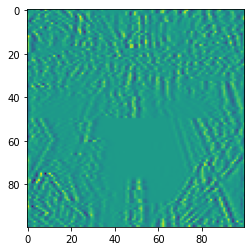

In [50]:
# 100 x 100 -> view((100,100))
#plt.imshow(broken_image) #이렇게만 하면 오류가 남
plt.imshow(broken_image.view(100,100)) #이렇게만 하면 오류가 남

In [51]:
# 이미지를 오염 시키는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [52]:
# 랜덤 텐서를 weird_function() 함수에 입력해 얻은 결과 (가설 텐서)
# 가설 텐서와 오염된 이미지 (broken_image) 사이의 오차 -> 함수
# torch.dist() 두 텐서 사이의 거리를 구하는 함수
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image) #단순 거리를 오차값으로 설정 

In [53]:
# 경사하강법을 통해서 (가중치 조정을 통해) 언젠가는 원본 이미지 형상을 하게 될 랜덤 텐서 
torch.manual_seed(100)
random_tensor = torch.randn(10000, dtype=torch.float) #1차원 벡터 (10000개 속성을 가지는) #처음값은 어차피 바꿀거라 뭘 넣든 상관없음 
random_tensor, random_tensor.shape

(tensor([ 0.1268,  1.3564,  0.5632,  ...,  1.0732, -1.1711, -0.6963]),
 torch.Size([10000]))

학습률 `learning rate`
* 경사하강법은 여러 번 반복해서 이뤄짐
* 이때 한 반복에서 최솟점으로 얼마나 많이 이동하는지, 즉 학습을 얼마나 급하게 진행하는지를 정하는 매개변수 = 학습률
* 학습률이 너무 크면 오차 함수(손실 함수)의 최솟점을 찾지 못하고 지나치게 되고, 값이 너무 작으면 학습 속도가 느려짐
![학습률](https://github.com/bigdata-young/ai_26th/raw/main/img/dl_01_02.jpg)

In [54]:
# 학습률 learning rate
lr = 0.8

In [56]:
# 경사하강법을 적용하기 위한 반복문 구현
# 오차 함수를 random_tensor 미분 -> 기울기 -> 가중치 -> 오차 감소 

for i in range(20000):
  random_tensor.requires_grad_(True) # random_tensor를 weird_function() 함수에 통과 시킨 후에 hypothesis를 구할 예정 
  # (hypothesis)가설을 미분 시키면 random_tensor.grad 에 미분 계수가 저장 되겟죠?
  hypothesis = weird_function(random_tensor)
  # distance_loss() 함수에 hypothesis(가설)와 broken_image(오염된이미지)를 입력해서 오차를 개선 
  # random_tensor -> (wf) -> hypothesis -> (dist.loss) -> loss -> 
  # 미분해서 연쇄법칙 하면 loss부터 반대로 가서 결과적으로 random_tensor 까지 가게 됨 그것을 해주는 함수 backward
  loss = distance_loss(hypothesis,broken_image)
  loss.backward() # loss.backward() 함수를 호출해 loss를 random_tensor 미분 
  with torch.no_grad(): # 자동 기울기 계산을 비활성화
  # 이 안 실행문을 통해서 직접 경사하강법을 구현할 예정 
    random_tensor = random_tensor - lr * random_tensor.grad
    # random_tensor.grad <- loss.backward() 함수에서 계산한 loss의 기울기
    # loss가 최대값이 되는 곳의 방향(반대 방향이면 오차가 제일 낮겠죠?) -> 이 방향의 반대쪽으로 random_tensor를 lr(학습률)만큼 이동시키는 겁니다
  if i % 1000 == 0: # % 1000 으로 나눴을 때의 나머지 0 -> 1001, 2001... 
    print(f'Loss at {i} = {loss.item()}') # item : 텐서의 스칼라값 추출

Loss at 0 = 12.521514892578125
Loss at 1000 = 1.13249671459198
Loss at 2000 = 0.5303594470024109
Loss at 3000 = 0.37029606103897095
Loss at 4000 = 0.2946311831474304
Loss at 5000 = 0.24802309274673462
Loss at 6000 = 0.2141505777835846
Loss at 7000 = 0.18697412312030792
Loss at 8000 = 0.16377736628055573
Loss at 9000 = 0.1431426703929901
Loss at 10000 = 0.12425555288791656
Loss at 11000 = 0.10661569237709045
Loss at 12000 = 0.08989931643009186
Loss at 13000 = 0.07388725131750107
Loss at 14000 = 0.05842559412121773
Loss at 15000 = 0.04340389743447304
Loss at 16000 = 0.028743894770741463
Loss at 17000 = 0.02115473710000515
Loss at 18000 = 0.02116546966135502
Loss at 19000 = 0.021167242899537086


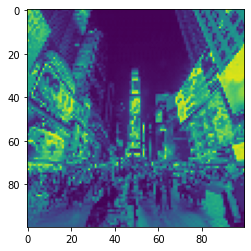

In [57]:
plt.imshow(random_tensor.view(100,100).data)

In [62]:
def epoch_test(epoch):
    torch.manual_seed(100)
    random_tensor = torch.randn(10000, dtype = torch.float)
    for i in range(epoch):
        random_tensor.requires_grad_(True)
        hypothesis = weird_function(random_tensor)
        loss = distance_loss(hypothesis, broken_image)
        loss.backward()
        with torch.no_grad():
            random_tensor = random_tensor - lr * random_tensor.grad
        if i % 1000 == 0:
            print(f'Loss at {i} = {loss.item()}')
    plt.imshow(random_tensor.view(100, 100).data)

Loss at 0 = 12.521514892578125


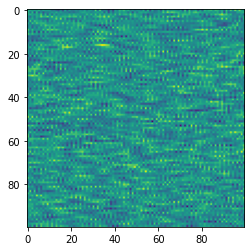

In [63]:
epoch_test(1000)

Loss at 0 = 12.521514892578125
Loss at 1000 = 1.13249671459198
Loss at 2000 = 0.5303594470024109
Loss at 3000 = 0.37029606103897095
Loss at 4000 = 0.2946311831474304


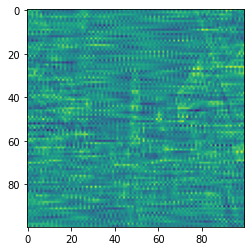

In [64]:
epoch_test(5000)

Loss at 0 = 12.521514892578125
Loss at 1000 = 1.13249671459198
Loss at 2000 = 0.5303594470024109
Loss at 3000 = 0.37029606103897095
Loss at 4000 = 0.2946311831474304
Loss at 5000 = 0.24802309274673462
Loss at 6000 = 0.2141505777835846
Loss at 7000 = 0.18697412312030792
Loss at 8000 = 0.16377736628055573
Loss at 9000 = 0.1431426703929901


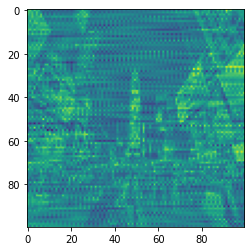

In [66]:
epoch_test(10000)

# 경사하강법으로 사인 함수 예측

**딥러닝 문제 해결 방식**
모델 정의 -> [모델 순전파 (입력->출력) -> 오차 계산 -> 오차 역전파 (가중치 업데이트)] -> 원하는 만큼 반복 -> 오차 최소화 -> 학습 종료 -> 모델 사용

In [67]:
import torch
import matplotlib.pyplot as plt
import math

In [ ]:
# 사인 함수의 모양을 예측 
# torch.linspace(시작점, 끝점, 개수) -> 텐서 (1차원 텐서)
# math.pi -> 원주율 파이 
x = torch.linspace(-math.pi, math.pi, 1000)
x

In [ ]:
# 실제 사인곡선 y
y = torch.sin(x) #x 값에 대응되는 사인함수의 결과값
# torch.sin -> 해당 벡터에 있는 값들에 대응하는 사인함수 결과값을 반환
y

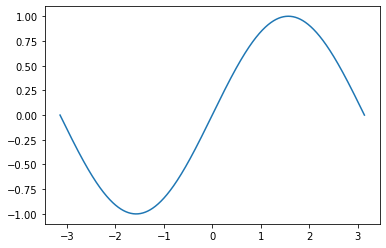

In [71]:
# 3차함수 모양
plt.plot(x,y)
plt.show() # 우리가 딥러닝해서 만들 것 

$ax^3 + bx^2 + cx + d$<br>
임의의 가중치(계수)를 뽑아서 예측 사인 곡선 => y 만들기

In [72]:
# y_random = a * x**3 + b * x**2 + c * x + d #위에 식을 표시한 것 

torch.manual_seed(500)
a = torch.randn(()) # 1개 짜리 랜덤값 () 빈 튜플 하나 더 넣어주기 
b = torch.randn(()) # 1개 짜리 랜덤값
c = torch.randn(()) # 1개 짜리 랜덤값
d = torch.randn(()) # 1개 짜리 랜덤값
y_random = a * x**3 + b * x**2 + c * x + d


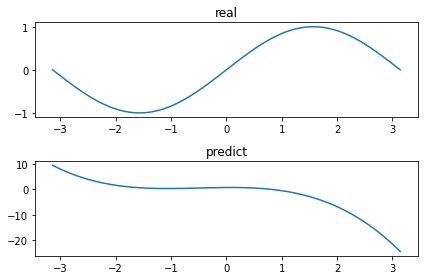

In [74]:
plt.subplot(2,1,1)
plt.title('real')
plt.plot(x,y)
plt.subplot(2,1,2)

plt.title('predict')
plt.plot(x,y_random)
plt.tight_layout()
plt.show() 

## 학습을 통해 가중치 적용 

epoch0 loss : 54985.25


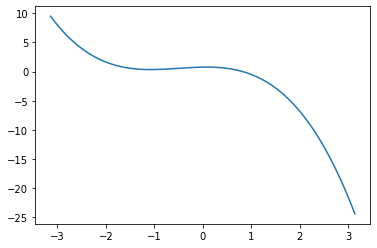

epoch200 loss : 388.61749267578125


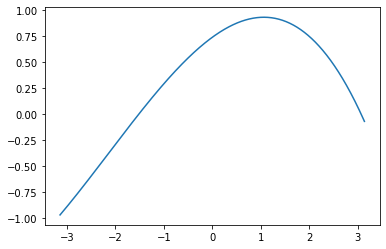

epoch400 loss : 269.7891540527344


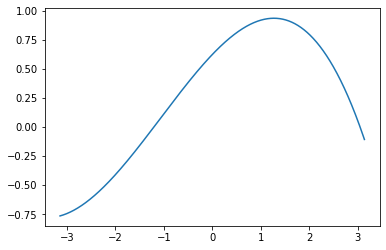

epoch600 loss : 187.907958984375


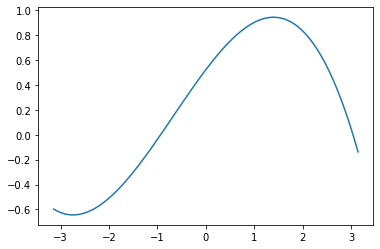

epoch800 loss : 131.42355346679688


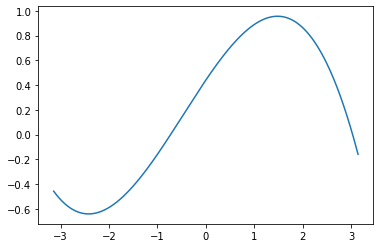

epoch1000 loss : 92.41668701171875


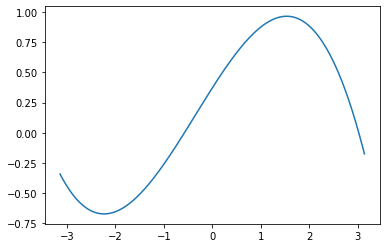

epoch1200 loss : 65.45076751708984


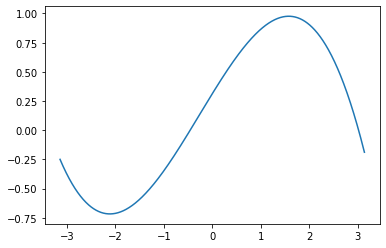

epoch1400 loss : 46.78948974609375


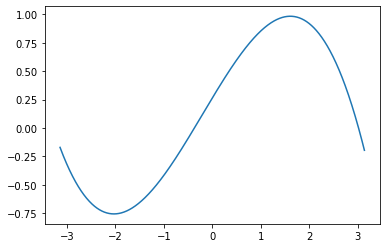

epoch1600 loss : 33.86231994628906


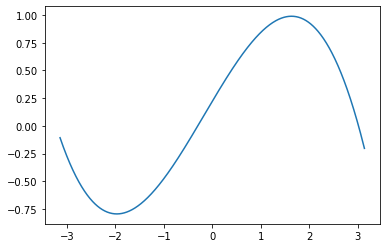

epoch1800 loss : 24.898351669311523


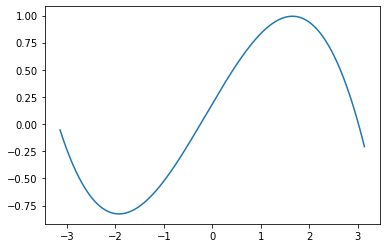

In [76]:
learning_rate = 1e-6 # 0.000001 0이 6개나온 다음에 1이 나옴 
# 경사하강법으로 구해진 기울기를 얼마나 반영할건지

#구해진 기울기에 역방향으로 가야겠죠?

# 학습은 2000번
for epoch in range(2000):
  # 랜덤하게 생성된 a,b,c,d 계수로 구성된 삼차함수 곡선
  y_pred = a * x**3 + b * x**2 + c * x + d  #tensor
  # y = 실제 사인 함수를 사용해서 구한 값 (정답) - 실제값
  # y_pred = 예측값 
  # y_pred - 7 = 손실(오차)임 -> squared_error : 오차의 제곱을 (pow(2))을 sum 더해서 나온 값
  dist = y_pred - y
  # .pow(몇제곱) / .sum() /.item() 한개의 스칼라값만 추출
  loss = dist.pow(2).sum().item() # (예측값 - 실제값) ^ 2 -> 합 
  if epoch % 200 == 0:
    print(f"epoch{epoch} loss : {loss}") # 손실을 보여줌
    plt.plot(x,y_pred) 
    plt.show()

 # 경사하강법으로 새로운 가중치 (새로운 계수)
 # y_pred - y (dist)
 # 원래라면 backward 쓰면 알아서 됨  
  grad_y_pred = 2.0 * (y_pred - y) # 기울기의 미분값 pow 2니까 제곱이므로 2.0 * y_pred - y
  grad_a = (grad_y_pred * x ** 3).sum()
  grad_b = (grad_y_pred * x ** 2).sum()
  grad_c = (grad_y_pred * x).sum()
  grad_d = grad_y_pred.sum()

    # a, b, c, d 계수 - 가중치를 반영
    # -= 빼고 그 값을 대입 / +=
  a -= learning_rate * grad_a # 가중치를 업데이트 (기울기의 반대방향 * -1)
  b -= learning_rate * grad_b # -= 하는 이유 오차가 작아지는 방향 
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d  

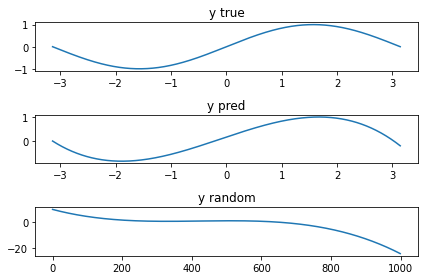

In [77]:
# 실제 사인 곡선
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)
# 예측한 가중치의 사인 곡선
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)
# 랜덤한 가중치의 사인 곡선
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(y_random)
# 출력
plt.tight_layout()
plt.show()